### Q-1. 
- Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:\\Users\\kotka\\Downloads\\instagram_reach.csv")

In [4]:
data.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [5]:
data.shape

(100, 8)

In [6]:
# drop unwanted features
data.drop(["Unnamed: 0","S.No","USERNAME"],axis=1,inplace=True)

In [7]:
data.head(2)

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Caption            94 non-null     object
 1   Followers          100 non-null    int64 
 2   Hashtags           100 non-null    object
 3   Time since posted  100 non-null    object
 4   Likes              100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [9]:
data["Time since posted"] = data["Time since posted"].apply(lambda x:x.replace("hours","")).astype(float)

In [10]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
cato = ["Caption","Hashtags"]
for i in cato:
    data[i] = lable.fit_transform(data[i])

In [11]:
x = data.drop(["Time since posted","Likes"],axis=1)
y = data[["Time since posted","Likes"]]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
def model_evaluation(test,pread):
    mse = mean_squared_error(test,pread)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,pread)
    r2 = r2_score(test,pread)
    
    return mse,rmse,mae,r2

In [16]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
forest.score(X_train,y_train)

0.8046631343792463

In [18]:
ypred = forest.predict(X_test)
model_evaluation(y_test,ypred)

(606.5399199999997, 24.62803118399844, 12.739999999999998, 0.12046549370508047)

### Q-2. Imagine you have a dataset where you have different features like Age ,

Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [19]:
data = pd.read_csv("C:\\Users\\kotka\\AppData\\Local\\Temp\\Temp1_archive (3).zip\\ObesityDataSet_raw_and_data_sinthetic.csv")

In [20]:
data.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [21]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [24]:
# saprate numerical and catigorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


<AxesSubplot:ylabel='NObeyesdad'>

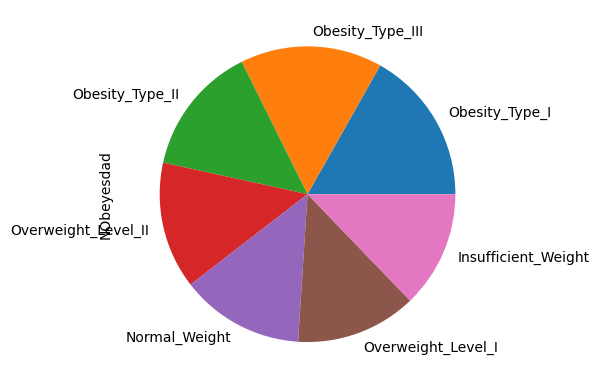

In [25]:
data['NObeyesdad'].value_counts().plot.pie()

In [26]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<AxesSubplot:>

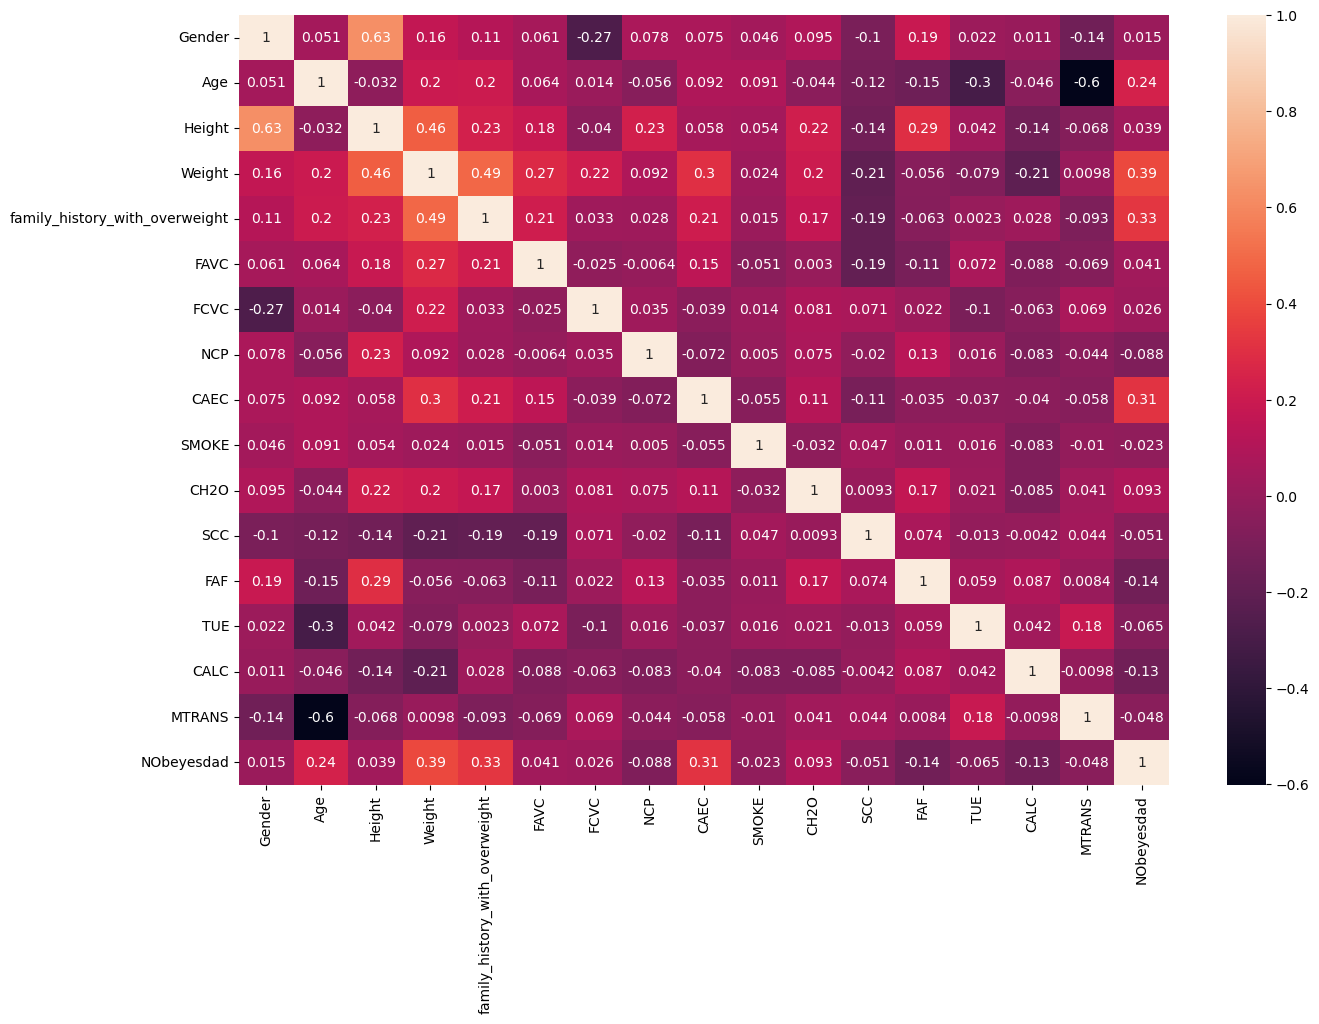

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [28]:
x = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']


In [30]:
# saprate numerical and catigorical frature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

In [33]:
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
logestic = LogisticRegression(class_weight="balanced")
logestic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [37]:
logestic.score(X_train,y_train)

0.8939484721390054

In [38]:
y_pred = logestic.predict(X_test)
accuracy_score(y_test,y_pred)

0.868421052631579

In [39]:
# Support Vector mechine
svm = SVC(C=10)
svm.fit(X_train,y_train)

SVC(C=10)

In [40]:
svm.score(X_train,y_train)

0.9988016776512882

In [41]:
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.9114832535885168

In [42]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced",min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [43]:
tree.score(X_train,y_train)

0.982025164769323

In [44]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.9090909090909091

In [45]:
# RandomForest
forest = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight="balanced",min_samples_split=5)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200)

In [46]:
forest.score(X_train,y_train)

0.9994008388256441

In [47]:
y_pred = forest.predict(X_test)
accuracy_score(y_test,y_pred)


0.9521531100478469

### Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.

In [52]:
import json
with open("C:\\Users\\kotka\\Downloads\\archive (4)\\News_Category_Dataset_v3.json",'r') as f:
    jdata = f.read()

jdata2  = [json.loads(line) for line in jdata.split('\n') if line]
data = pd.DataFrame.from_records(jdata2)

In [54]:
data.head(2)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23


### Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [55]:
data = pd.read_csv("C:\\Users\\kotka\\AppData\\Local\\Temp\\Temp1_archive (5).zip\\online_shoppers_intention.csv")

In [56]:
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [58]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [59]:
data.duplicated().sum()

125

In [60]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [61]:
data["Revenue"] = data["Revenue"].map({True:1,False:0})
data['Weekend'] = data['Weekend'].map({True:1,False:0})
# saprate numerical and catigorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')


In [62]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<AxesSubplot:>

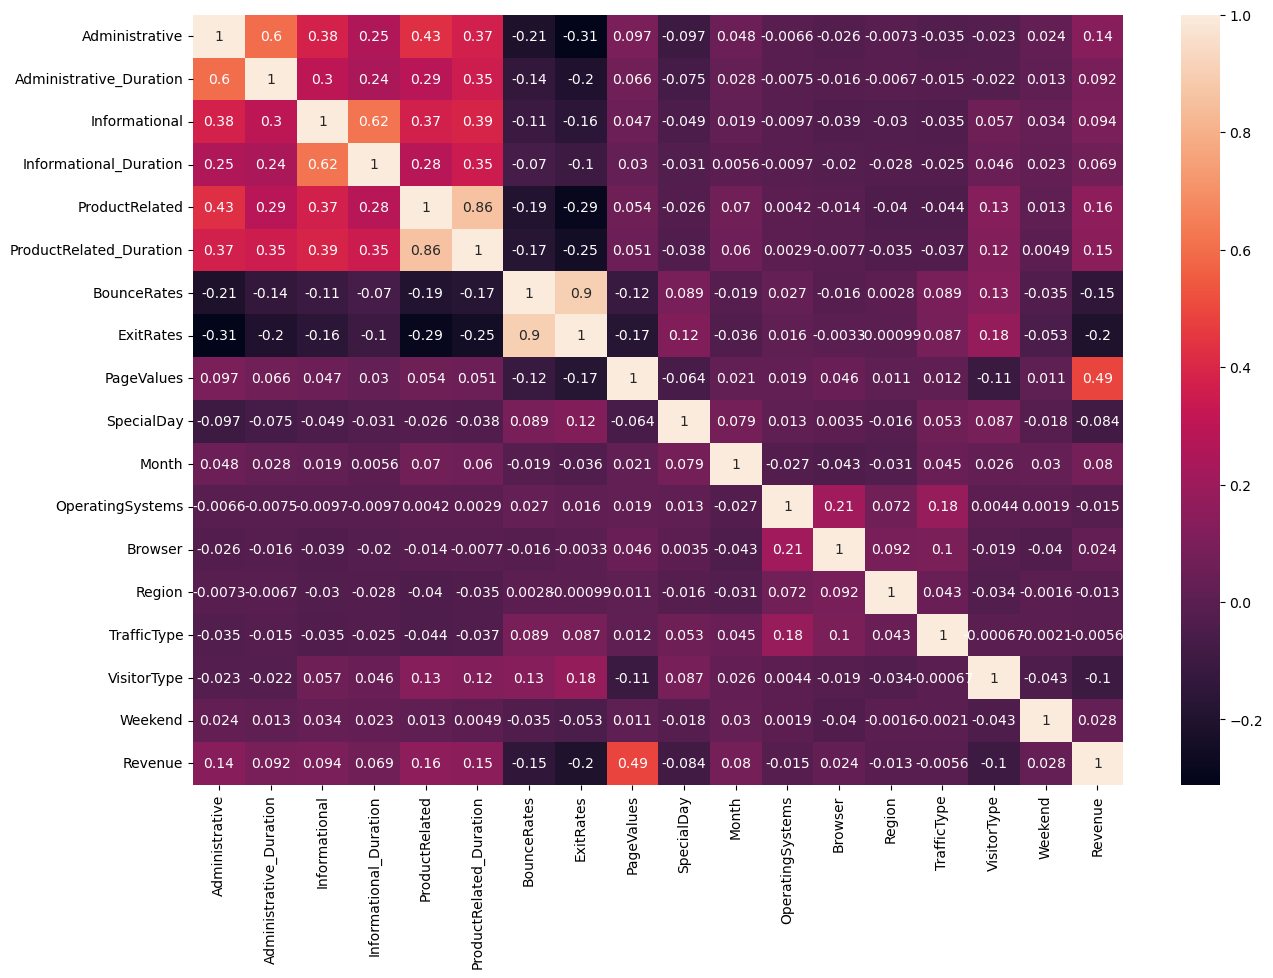

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [64]:
x = data.drop("Revenue",axis=1)
y = data["Revenue"]

In [65]:
# saprate numerical and catigorical frature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [67]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# RandomForest
forest = RandomForestClassifier(n_estimators=250,max_depth=15,class_weight="balanced",min_samples_split=6)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=6, n_estimators=250)

In [69]:
forest.score(X_train,y_train)

0.9685579680458828

In [70]:
y_pred = forest.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2079
           1       0.63      0.65      0.64       362

    accuracy                           0.89      2441
   macro avg       0.79      0.79      0.79      2441
weighted avg       0.89      0.89      0.89      2441



In [71]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=50)
bagging.fit(X_train,y_train)

BaggingClassifier(n_estimators=50)

In [72]:
bagging.score(X_train,y_train)

y_pred = bagging.predict(X_test)
accuracy_score(y_test,y_pred)

0.8963539532978287

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2079
           1       0.69      0.54      0.61       362

    accuracy                           0.90      2441
   macro avg       0.81      0.75      0.77      2441
weighted avg       0.89      0.90      0.89      2441



### Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [76]:
data = pd.read_csv("C:\\Users\\kotka\\Downloads\\rideshare_kaggle.csv\\rideshare_kaggle.csv")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)
data.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [77]:
data.tail(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [79]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [81]:
data["price"] = data["price"].fillna(np.nanmedian(data["price"]))
data.drop(["id","timestamp","product_id","datetime"],axis=1,inplace=True)
# saprate numerical and catigorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['timezone', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')
Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemp

In [82]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

In [83]:
# Calculate the correlation matrix
correlation_matrix = data.corr().abs()

# Set the threshold for correlation value
threshold = 0.8

# Find highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove the correlated features from the DataFrame
data = data.drop(correlated_features, axis=1)

# Print the remaining features
print("Selected Features:")
print(data.columns)

Selected Features:
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'long_summary', 'precipIntensity',
       'humidity', 'windSpeed', 'windGustTime', 'visibility', 'temperatureLow',
       'icon', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMin'],
      dtype='object')


In [84]:
x = data.drop("price",axis=1)
y = data["price"]
# saprate numerical and catigorical frature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipIntensity', 'humidity',
       'windSpeed', 'windGustTime', 'visibility', 'temperatureLow', 'icon',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMin'],
      dtype='object')


<AxesSubplot:>

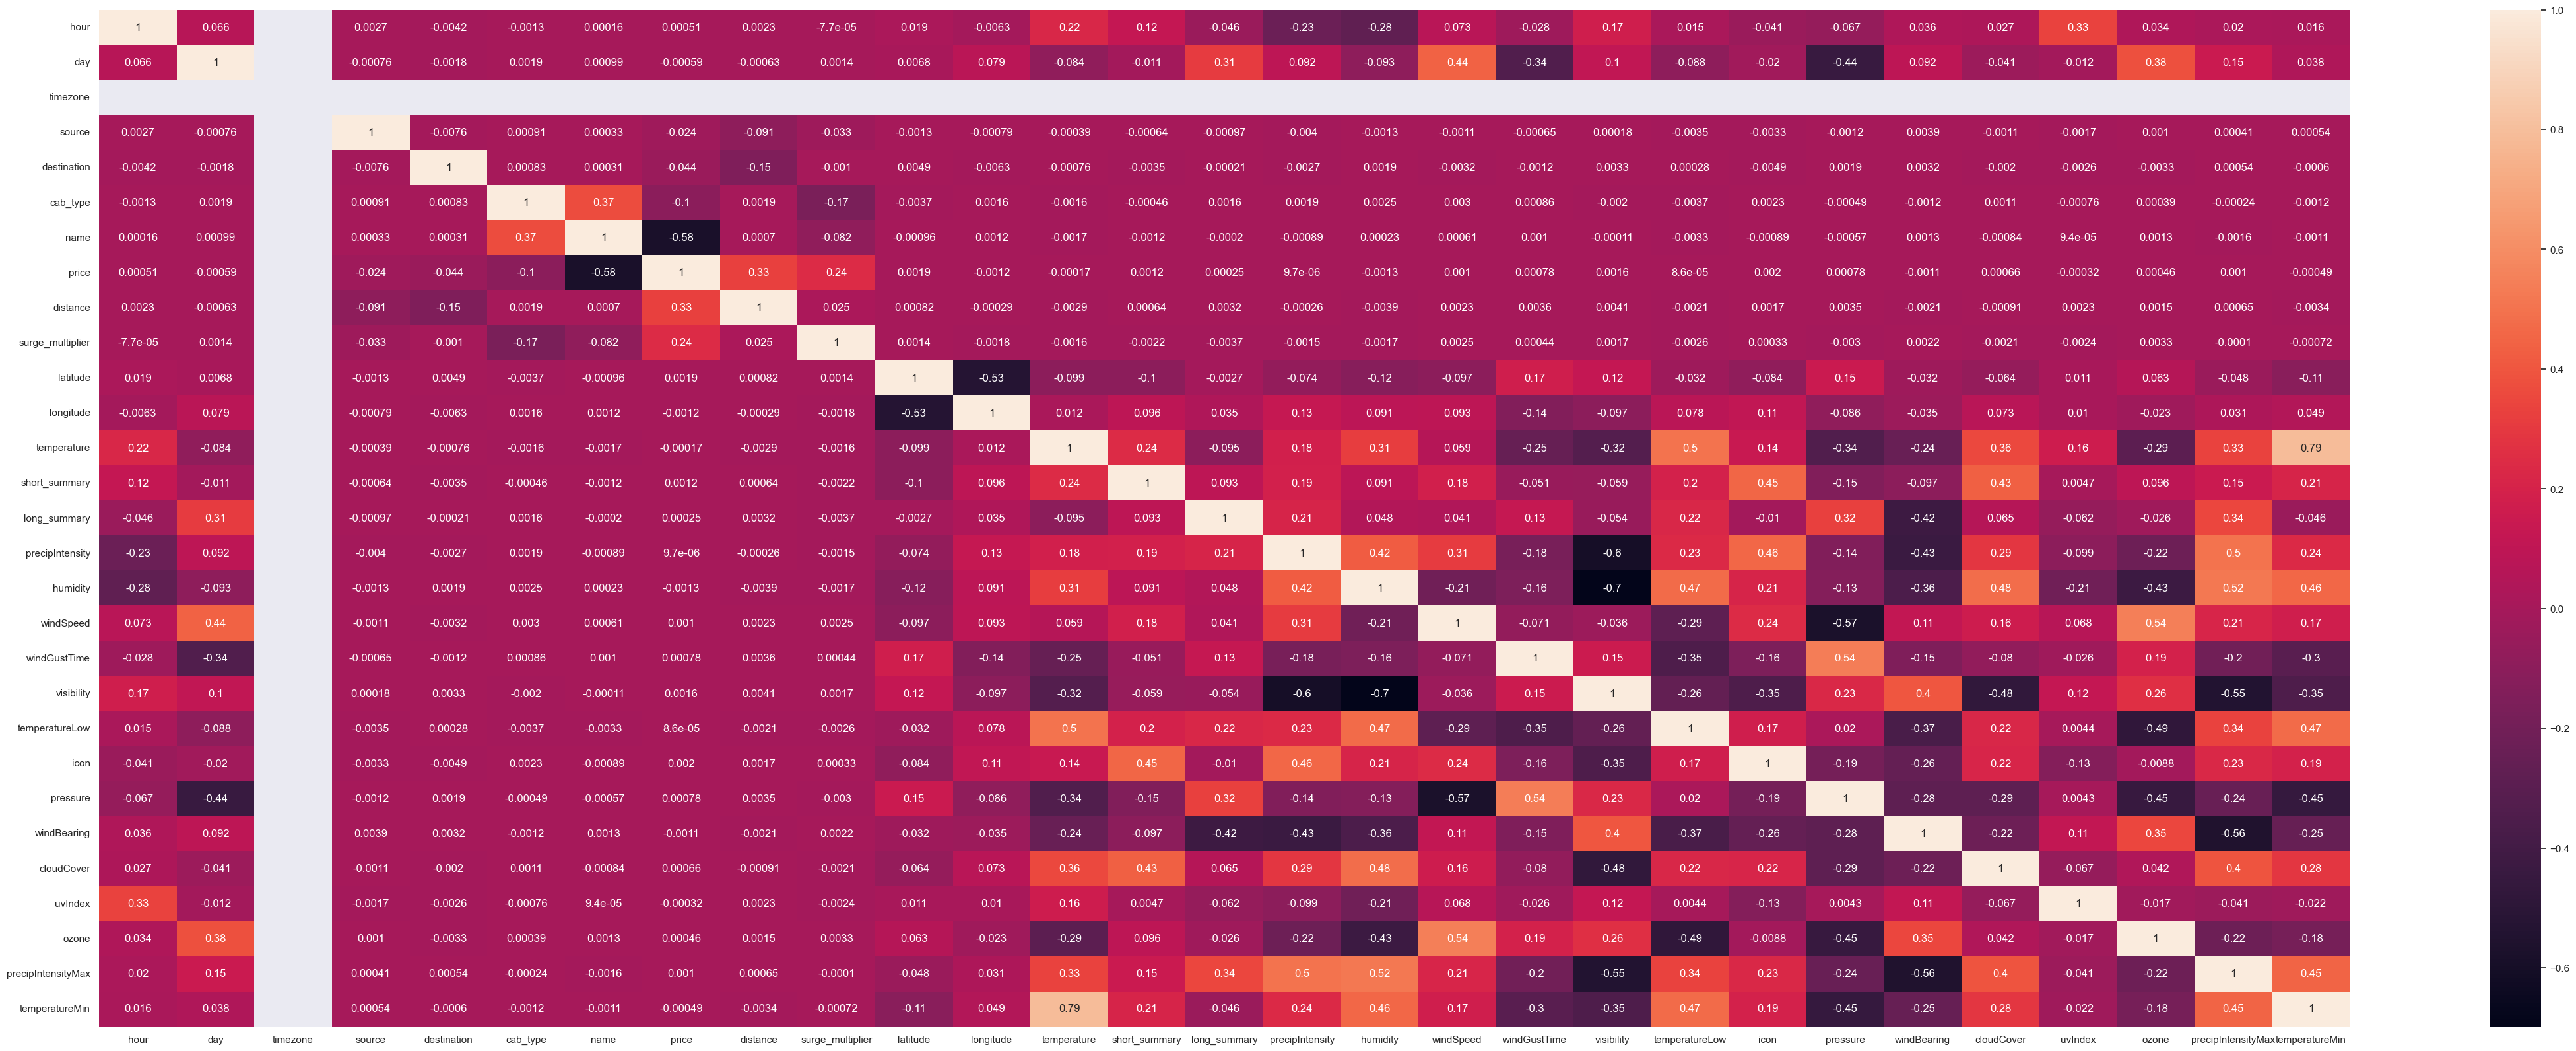

In [85]:
plt.figure(figsize=(55,20))
sns.heatmap(data.corr(),annot=True)

In [86]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [87]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
forest = RandomForestRegressor(n_estimators=300,max_depth=30,max_samples=10,max_leaf_nodes=8)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=8, max_samples=10,
                      n_estimators=300)

In [88]:
forest.score(X_train,y_train)

y_pred = forest.predict(X_test)
model_evaluation(y_test,y_pred)

(47.26893969067613, 6.875241064186486, 5.332836471521841, 0.4135013770242272)